In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('yield_df.csv')

In [3]:
raw_data.sample(5)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
6812,6812,Colombia,Maize,2007,27661,3240.0,82439.06,22.48
25611,25611,Spain,Soybeans,2010,23655,636.0,39043.00,12.01
17150,17150,Kazakhstan,Maize,1992,31214,250.0,17182.00,2.78
26979,26979,Turkey,Potatoes,2008,282947,593.0,37640.20,18.47
17017,17017,Japan,Yams,2010,226963,1668.0,55576.00,16.12


In [4]:
data = raw_data.copy()

In [5]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [7]:
data_drop_id = data.drop(['Unnamed: 0','Area'],axis=1)

In [8]:
data_drop_id.sample(4)

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
22356,"Rice, paddy",2000,30312,494.0,27885.00,26.71
20450,Maize,2007,25000,241.0,0.55,11.59
8287,Wheat,2005,64929,51.0,5471.00,21.08
10319,Cassava,2009,65876,1976.0,4344.36,24.77


In [9]:
data_drop_id.isnull().sum()

Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
data_drop_id.describe(include='all')

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Potatoes,NaN,NaN,NaN,NaN,NaN
freq,4276,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,NaN,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,NaN,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,NaN,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,NaN,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,NaN,2008.000000,104676.750000,1668.00000,48687.880000,26.000000


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hg/ha_yield', ylabel='Density'>

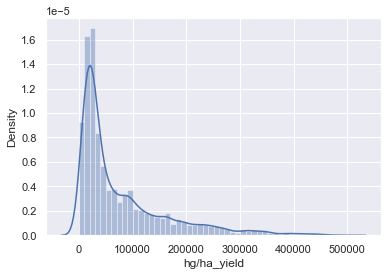

In [11]:
sns.distplot(data_drop_id['hg/ha_yield'])

In [12]:
# Let's declare a variable that will be equal to the 99th percentile of the 'hg/ha_yield' variable
q = data_drop_id['hg/ha_yield'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'hg/ha_yield'
data_removed_outliers = data_drop_id[data_drop_id['hg/ha_yield']<q]
# In this way we have essentially removed the top 1% of the data about 'hg/ha_yield'
data_removed_outliers .describe(include='all')

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,27955,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Maize,NaN,NaN,NaN,NaN,NaN
freq,4121,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.517510,73546.762440,1149.785262,37178.069950,20.633246
std,NaN,7.050113,77939.912902,712.478390,60223.017908,6.258759
min,NaN,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,NaN,1995.000000,19753.500000,591.000000,1670.000000,16.840000
50%,NaN,2001.000000,37607.000000,1083.000000,17278.650000,21.560000
75%,NaN,2008.000000,101288.000000,1668.000000,48727.730000,26.030000


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hg/ha_yield', ylabel='Density'>

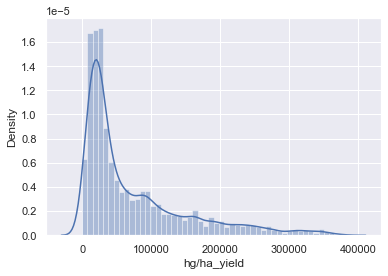

In [13]:
sns.distplot(data_removed_outliers['hg/ha_yield'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pesticides_tonnes', ylabel='Density'>

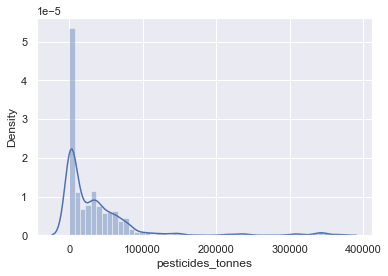

In [14]:
sns.distplot(data_removed_outliers['pesticides_tonnes'])

In [15]:
# Let's declare a variable that will be equal to the 99th percentile of the 'hg/ha_yield' variable
q = data_removed_outliers['pesticides_tonnes'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'hg/ha_yield'
data_removed_outliers_2 = data_removed_outliers[data_removed_outliers['pesticides_tonnes']<q]
# In this way we have essentially removed the top 1% of the data about 'hg/ha_yield'
data_removed_outliers_2 .describe(include='all')

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,27658,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Maize,NaN,NaN,NaN,NaN,NaN
freq,4088,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.404946,73365.255514,1143.221853,33785.292951,20.611303
std,NaN,7.002715,77938.948914,713.457646,50804.540922,6.277713
min,NaN,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,NaN,1995.000000,19576.750000,591.000000,1670.000000,16.770000
50%,NaN,2001.000000,37350.000000,1083.000000,16817.000000,21.550000
75%,NaN,2008.000000,101190.000000,1668.000000,46195.000000,26.020000


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pesticides_tonnes', ylabel='Density'>

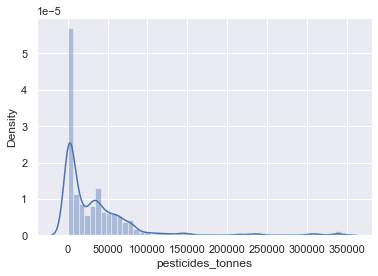

In [16]:
sns.distplot(data_removed_outliers_2['pesticides_tonnes'])

In [17]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_removed_outliers_2.reset_index(drop=True)
data_cleaned.describe(include='all')

,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,27658,27658.000000,27658.000000,27658.000000,27658.000000,27658.000000
unique,10,NaN,NaN,NaN,NaN,NaN
top,Maize,NaN,NaN,NaN,NaN,NaN
freq,4088,NaN,NaN,NaN,NaN,NaN
mean,NaN,2001.404946,73365.255514,1143.221853,33785.292951,20.611303
std,NaN,7.002715,77938.948914,713.457646,50804.540922,6.277713
min,NaN,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,NaN,1995.000000,19576.750000,591.000000,1670.000000,16.770000
50%,NaN,2001.000000,37350.000000,1083.000000,16817.000000,21.550000
75%,NaN,2008.000000,101190.000000,1668.000000,46195.000000,26.020000


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['hg/ha_yield','Year','pesticides_tonnes','average_rain_fall_mm_per_year','avg_temp']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [19]:
vif

,VIF,Features
0,1.907311,hg/ha_yield
1,13.650550,Year
2,1.491602,pesticides_tonnes
3,4.069444,average_rain_fall_mm_per_year
4,13.157713,avg_temp


In [20]:
data_no_multicollinearity = data_cleaned.drop(["Year"],axis=1)
data_preprocessed = data_no_multicollinearity.reset_index(drop=True)
data_preprocessed.head(2)

,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Maize,36613,1485.0,121.0,16.37
1,Potatoes,66667,1485.0,121.0,16.37


In [21]:
data_preprocessed.to_csv('yield_preprocessed.csv', index=False)

In [22]:
data_preprocessed = pd.read_csv("yield_preprocessed.csv")

In [23]:
data_preprocessed.sample(4)

,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
2114,Sweet potatoes,95714,2666.0,1487.0,25.73
17171,Cassava,112309,630.0,1578.0,16.90
11853,Wheat,25901,1083.0,46195.0,26.96
8013,"Rice, paddy",94217,51.0,11590.0,23.72


In [24]:
inputs = data_preprocessed.iloc[:,1:-1]
targets = data_preprocessed.iloc[:,0:1]

In [25]:
input_scaler = StandardScaler()
input_scaler.fit(inputs)
input_scaled = input_scaler.transform(inputs)

In [26]:
input_scaled

array([[-0.47156037,  0.47905342, -0.66263568],
       [-0.08594389,  0.47905342, -0.66263568],
       [-0.64195323,  0.47905342, -0.66263568],
       ...,
       [-0.77271178, -0.68151298, -0.61482275],
       [-0.65620823, -0.68151298, -0.61482275],
       [-0.64766293, -0.68151298, -0.61482275]])

In [27]:
input_scaled.shape

(27658, 3)

In [28]:
from sklearn.model_selection import train_test_split
# declare 4 variables for the split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 20)

In [29]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(22126, 3) (22126, 1)
(5532, 3) (5532, 1)


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
clf.score(x_train,y_train)

0.998960498960499

In [32]:
prediction = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(prediction,y_test)

0.85647143890094

# Post pruning decision trees with cost complexity pruning


.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.


In [33]:
from sklearn import tree
#plt.figure(figsize=(15,10))
#tree.plot_tree(clf,filled=True)

In [34]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 3.01304649e-06, 7.53261623e-06, ...,
       1.92448554e-02, 2.28889790e-02, 7.89763912e-02])

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07897639118053579


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

# Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 82% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.000026 maximizes the testing accuracy.

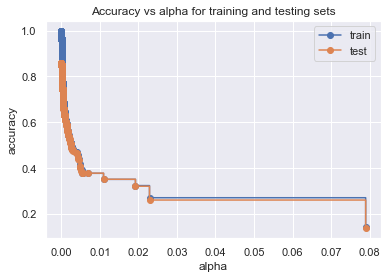

In [44]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.000028)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=2.8e-05, random_state=0)

In [50]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8571945046999276